# 1.Executive Summary

## Research Topic:

### Fraud Detection on Transctions of Etherum Cryptocurrency

## Research Domain:
### The domain of this research includes the economics and cryptocurrency transactions. Basically it tries to determine whether their are more valid transactions or more frauds on the transactions of etherum (a well known crypto currency).


## Research Question:
### Are there more number of fradulent or valid transactions of etherum(cryptocurrency)?

## Research Hypothesis:
### There are more number of frauds than valid transactions on etherum.

## Conclusion:
### The number of valid transactions are more than the number of fradulent transactions on etherum(crypto)

# 2.1 Importing the Libraries:


In [220]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

# 2.2 Loading the Dataset

In [221]:
data=pd.read_csv("transaction_dataset.csv")
data

Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2              2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3              3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
...          ...    ...                                         ...   ...   
9836        9836   2175  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1   
9837        9837   2176  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
9838        9838   2177  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1   
9839        9839   2178  0xffde23396d57e10abf58bd929bb1e856c7718218     1   
9840        9840   2179  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min between received tnx  \
0                       844.26                       1093.71   
1                     12709.07                       2958.44   
2                    246194.54                       2434.02   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
...                        ...                           ...   
9836                  12635.10                        631.39   
9837                      0.00                          0.00   
9838                   2499.44                       2189.29   
9839                      0.00                          0.00   
9840                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63       721            89   
1                                  1218216.73        94             8   
2                                   516729.30         2            10   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
...                                       ...       ...           ...   
9836                                 58748.48         4            13   
9837                                     0.00         0             0   
9838                                261601.88        67            43   
9839                                     0.00         0             1   
9840                                670817.33        18             3   

      Number of Created Contracts  ...   ERC20 min val sent  \
0                               0  ...             0.000000   
1                               0  ...             2.260809   
2                               0  ...             0.000000   
3                               0  ...           100.000000   
4                               1  ...             0.000000   
...                           ...  ...                  ...   
9836                            0  ...             0.000000   
9837                            0  ...             0.000000   
9838                            0  ...             0.000000   
9839                            0  ...                  NaN   
9840                            0  ...             0.000000   

       ERC20 max val sent   ERC20 avg val sent   ERC20 min val sent contract  \
0            1.683100e+07        271779.920000                           0.0   
1            2.260809e+00             2.260809                           0.0   
2            0.000000e+00             0.000000                           0.0   
3            9.029231e+03          3804.076893                           0.0   
4            4.500000e+04         13726.659220                           0.0   
...                   ...                  ...                           ...   
9836         0.000000e+00             0.000000                           0.0   
9837         0.000000e+00             

# Exploratory Data Analysis


### Shape of Dataset

In [222]:
data.shape

(9841, 51)

### Preview DataSet

In [223]:
data.head()


Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  ...   ERC20 min val sent   ERC20 max val sent  \
0                            0  ...             0.000000         1.683100e+07   
1                            0  ...             2.260809         2.260809e+00   
2                            0  ...             0.000000         0.000000e+00   
3                            0  ...           100.000000         9.029231e+03   
4                            1  ...             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 min val sent contract  \
0        271779.920000                           0.0   
1             2.260809                           0.0   
2             0.000000                           0.0   
3          3804.076893                           0.0   
4         13726.659220                           0.0   

    ERC20 max val sent contract   ERC20 avg val sent contract  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

    ERC20 uniq sent token name   ERC20 uniq rec token name  \
0                         39.0                        57.0   
1                          1.0                         7.0   
2                          0.0                         8.0   
3                          1.0                        11.0   
4                          6.0                        27.0   

    ERC20 most sent token type   ERC20_most_rec_token_type  
0                    Cofoundit                   Numeraire  
1               Livepeer Token              Livepeer Token  
2                         None                       XENON  
3                       Raiden                       XENON  
4                StatusNetwork                         EOS  

[5 rows x 51 columns]

### Summary of Data

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [225]:
data.isnull()

Unnamed: 0  Index  Address   FLAG  Avg min between sent tnx  \
0          False  False    False  False                     False   
1          False  False    False  False                     False   
2          False  False    False  False                     False   
3          False  False    False  False                     False   
4          False  False    False  False                     False   
...          ...    ...      ...    ...                       ...   
9836       False  False    False  False                     False   
9837       False  False    False  False                     False   
9838       False  False    False  False                     False   
9839       False  False    False  False                     False   
9840       False  False    False  False                     False   

      Avg min between received tnx  Time Diff between first and last (Mins)  \
0                            False                                    False   
1                            False                                    False   
2                            False                                    False   
3                            False                                    False   
4                            False                                    False   
...                            ...                                      ...   
9836                         False                                    False   
9837                         False                                    False   
9838                         False                                    False   
9839                         False                                    False   
9840                         False                                    False   

      Sent tnx  Received Tnx  Number of Created Contracts  ...  \
0        False         False                        False  ...   
1        False         False                        False  ...   
2        False         False                        False  ...   
3        False         False                        False  ...   
4        False         False                        False  ...   
...        ...           ...                          ...  ...   
9836     False         False                        False  ...   
9837     False         False                        False  ...   
9838     False         False                        False  ...   
9839     False         False                        False  ...   
9840     False         False                        False  ...   

       ERC20 min val sent   ERC20 max val sent   ERC20 avg val sent  \
0                   False                False                False   
1                   False                False                False   
2                   False                False                False   
3                   False                False                False   
4                   False                False                False   
...                   ...                  ...                  ...   
9836                False                False                False   
9837                False                False                False   
9838                False                False                False   
9839                 True                 True                 True   
9840                False                False                False   

       ERC20 min val sent contract   ERC20 max val sent contract  \
0                            False                         False   
1                            False                         False   
2                            False                         False   
3                            False                         False   
4                            False                         False   
...                            ...                           ...   
9836                         False                         False   
9837                         False    

### As some column are true so there is null values in the data

In [226]:
data[' ERC20 most sent token type'].value_counts()

0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name:  ERC20 most sent token type, Length: 305, dtype: int64

In [227]:
column=data.columns
column

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [228]:
data['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

### Fraud and Not Fraud PieChart

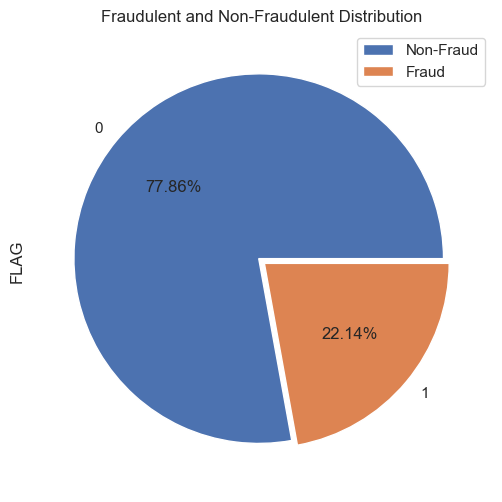

In [229]:
round(100*data['FLAG'].value_counts(normalize=True),2).plot(kind='pie',explode=[0.02]*2, figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraudulent and Non-Fraudulent Distribution")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

In [230]:
data[' ERC20_most_rec_token_type'].replace({'0':np.NaN},inplace = True)
data[' ERC20 most sent token type'].replace({'0':np.NaN},inplace = True)

### Droping the columns having the null values

In [231]:
#Drop the columns ' ERC20 most sent token type' and ' ERC20_most_rec_token_type' as they have many null ,0,None values
data.drop(['Index',' ERC20_most_rec_token_type',' ERC20 most sent token type'],axis=1,inplace=True)

In [232]:
data.drop([' ERC20 avg time between sent tnx',' ERC20 avg time between rec tnx',' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx',' ERC20 min val sent contract',' ERC20 max val sent contract',' ERC20 avg val sent contract'],axis=1,inplace=True)

### Correlation Matrix

In [233]:

corr = data.corr()
corr

Unnamed: 0      FLAG  \
Unnamed: 0                                            1.000000  0.719153   
FLAG                                                  0.719153  1.000000   
Avg min between sent tnx                             -0.022847 -0.029754   
Avg min between received tnx                         -0.089393 -0.118533   
Time Diff between first and last (Mins)              -0.185789 -0.269354   
Sent tnx                                             -0.057103 -0.078006   
Received Tnx                                         -0.050315 -0.079316   
Number of Created Contracts                          -0.005023 -0.013711   
Unique Received From Addresses                       -0.016921 -0.031941   
Unique Sent To Addresses                             -0.033909 -0.045584   
min value received                                   -0.021266 -0.021641   
max value received                                   -0.013765 -0.019259   
avg val received                                     -0.017349 -0.011881   
min val sent                                         -0.003957  0.006626   
max val sent                                         -0.032754 -0.022437   
avg val sent                                         -0.054573 -0.063556   
min value sent to contract                           -0.012114 -0.007213   
max val sent to contract                              0.000634 -0.007988   
avg value sent to contract                           -0.003715 -0.008883   
total transactions (including tnx to create con...   -0.067501 -0.100289   
total Ether sent                                     -0.027697 -0.014993   
total ether received                                 -0.016845 -0.016900   
total ether sent contracts                            0.000634 -0.007988   
total ether balance                                   0.015632 -0.003229   
 Total ERC20 tnxs                                    -0.008203 -0.025697   
 ERC20 total Ether received                           0.000601 -0.004475   
 ERC20 total ether sent                               0.020405  0.024762   
 ERC20 total Ether sent contract                      0.012124  0.013514   
 ERC20 uniq sent addr                                -0.012013 -0.020554   
 ERC20 uniq rec addr                                 -0.011191 -0.017539   
 ERC20 uniq sent addr.1                              -0.000714 -0.003047   
 ERC20 uniq rec contract addr                        -0.011809 -0.018527   
 ERC20 min val rec                                    0.008496  0.011163   
 ERC20 max val rec                                    0.000764 -0.004313   
 ERC20 avg val rec                                    0.008451  0.007881   
 ERC20 min val sent                                   0.020647  0.025364   
 ERC20 max val sent                                   0.020268  0.025038   
 ERC20 avg val sent                                   0.020190  0.025044   
 ERC20 uniq sent token name                           0.009638  0.009249   
 ERC20 uniq rec token name                           -0.011288 -0.018047   

                                                    Avg min between sent tnx  \
Unnamed: 0                                                         -0.022847   
FLAG                                                               -0.029754   
Avg min between sent tnx                                            1.000000   
Avg min between received tnx                                        0.060979   
Time Diff between first and last (Mins)                             0.214722   
Sent tnx                                                           -0.032289   
Received Tnx                                                       -0.035735   
Number of Created Contracts                                        -0.006186   
Unique Received From Addresses                                     -0.015912   
Unique Sent To Addresses                                           -0.017688   
min value received                                     

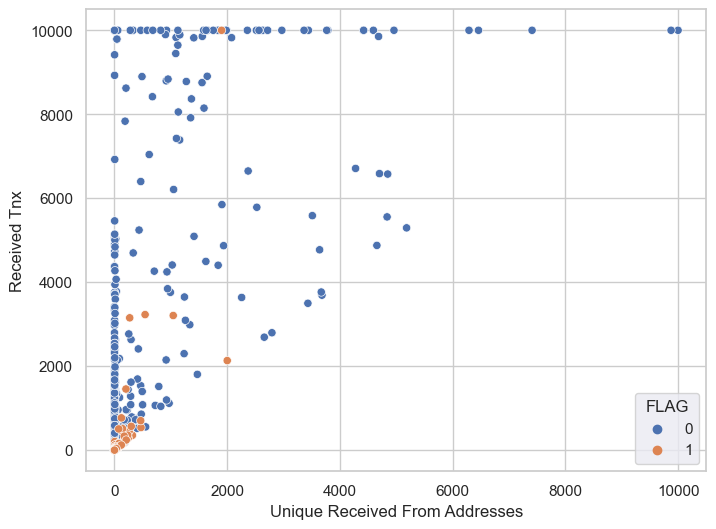

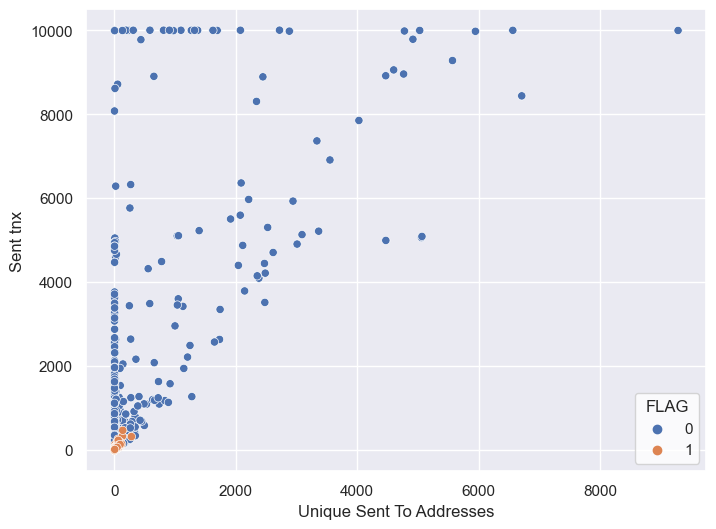

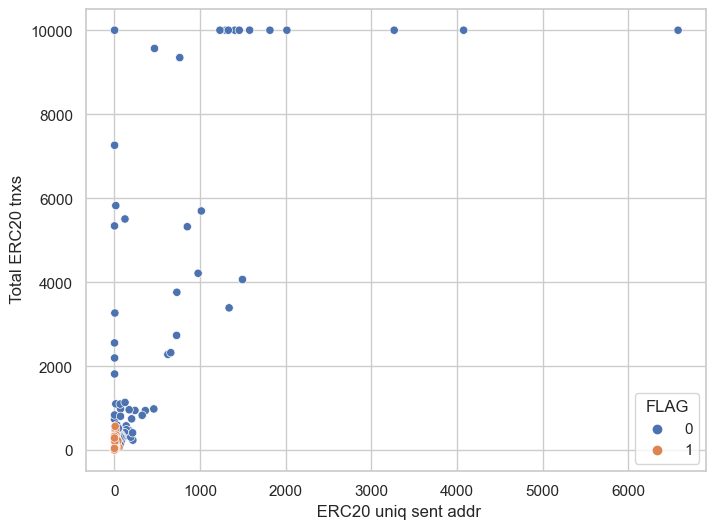

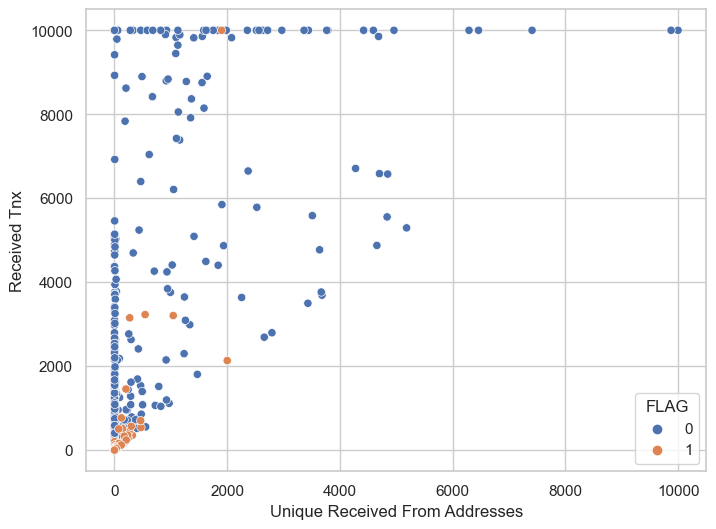

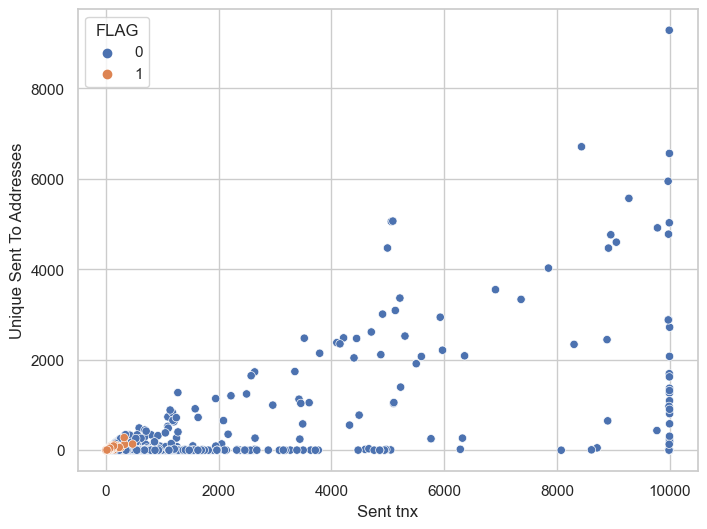

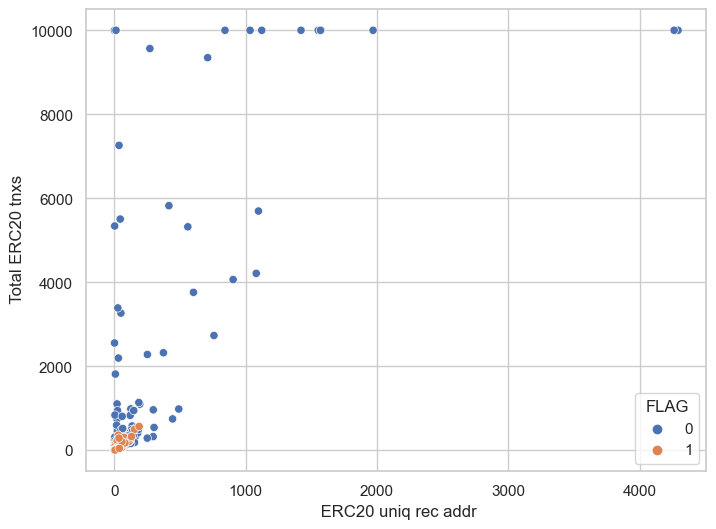

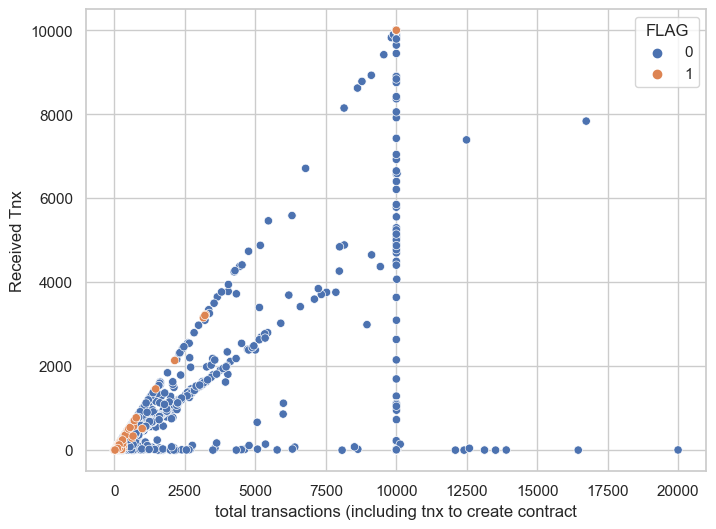

In [234]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = data,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = data,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = data,x = ' ERC20 uniq sent addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = data,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.show()



plt.subplots(figsize = (8, 6))
sns.scatterplot(data = data,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = data,x = ' ERC20 uniq rec addr', y= ' Total ERC20 tnxs',hue = 'FLAG' )
plt.show()


plt.subplots(figsize = (8, 6))
sns.scatterplot(data = data,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.show()


In [205]:
data.info

<bound method DataFrame.info of       Unnamed: 0                                     Address  FLAG  \
0              0  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2              2  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3              3  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
...          ...                                         ...   ...   
9836        9836  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1   
9837        9837  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
9838        9838  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1   
9839        9839  0xffde23396d57e10abf58bd929bb1e856c7718218     1   
9840        9840  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min between received tnx  \
0                       844.26                       1093.71   

In [235]:
data.isnull()
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN
data = data.fillna(0)

### K means Clustering With K=2

In [236]:
from sklearn.cluster import KMeans
data.drop(['Address'],axis=1, inplace = True)
data.head()

Unnamed: 0  FLAG  Avg min between sent tnx  Avg min between received tnx  \
0           0     0                    844.26                       1093.71   
1           1     0                  12709.07                       2958.44   
2           2     0                 246194.54                       2434.02   
3           3     0                  10219.60                      15785.09   
4           4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  ...   ERC20 uniq sent addr.1  \
0                       118  ...                      0.0   
1                        14  ...                      0.0   
2                         2  ...                      0.0   
3                        13  ...                      0.0   
4                        19  ...                      0.0   

    ERC20 uniq rec contract addr   ERC20 min val rec   ERC20 max val rec  \
0                           58.0                 0.0        1.500000e+07   
1                            7.0                 0.0        3.650000e+02   
2                            8.0                 0.0        4.428198e+02   
3                           11.0                 0.0        1.141223e+04   
4                           27.0                 0.0        9.000000e+04   

    ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent  \
0       265586.147600             0.000000         1.683100e+07   
1           57.632615             2.260809         2.260809e+00   
2           65.189009             0.000000         0.000000e+00   
3         1555.550174           100.000000         9.029231e+03   
4         4934.232147             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 uniq sent token name  \
0        271779.920000                         39.0   
1             2.260809                          1.0   
2             0.000000                          0.0   
3          3804.076893                          1.0   
4         13726.659220                          6.0   

    ERC20 uniq rec token name  
0                        57.0  
1                         7.0  
2                         8.0  
3                        11.0  
4                        27.0  

[5 rows x 40 columns]

In [237]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(data)
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    9840
1       1
Name: cluster, dtype: int64

In [209]:
kmeans.cluster_centers_
data.head()

Unnamed: 0  FLAG  Avg min between sent tnx  Avg min between received tnx  \
0           0     0                    844.26                       1093.71   
1           1     0                  12709.07                       2958.44   
2           2     0                 246194.54                       2434.02   
3           3     0                  10219.60                      15785.09   
4           4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  ...   ERC20 uniq rec contract addr  \
0                       118  ...                           58.0   
1                        14  ...                            7.0   
2                         2  ...                            8.0   
3                        13  ...                           11.0   
4                        19  ...                           27.0   

    ERC20 min val rec   ERC20 max val rec   ERC20 avg val rec  \
0                 0.0        1.500000e+07       265586.147600   
1                 0.0        3.650000e+02           57.632615   
2                 0.0        4.428198e+02           65.189009   
3                 0.0        1.141223e+04         1555.550174   
4                 0.0        9.000000e+04         4934.232147   

    ERC20 min val sent   ERC20 max val sent   ERC20 avg val sent  \
0             0.000000         1.683100e+07        271779.920000   
1             2.260809         2.260809e+00             2.260809   
2             0.000000         0.000000e+00             0.000000   
3           100.000000         9.029231e+03          3804.076893   
4             0.000000         4.500000e+04         13726.659220   

    ERC20 uniq sent token name   ERC20 uniq rec token name  cluster  
0                         39.0                        57.0        0  
1                          1.0                         7.0        0  
2                          0.0                         8.0        0  
3                          1.0                        11.0        0  
4                          6.0                        27.0        0  

[5 rows x 41 columns]

In [238]:
kmeans.inertia_

2.9948569760692993e+22

#### As the inertia is less so that the model fitted is better

### Use elbow method to find optimal number of clusters

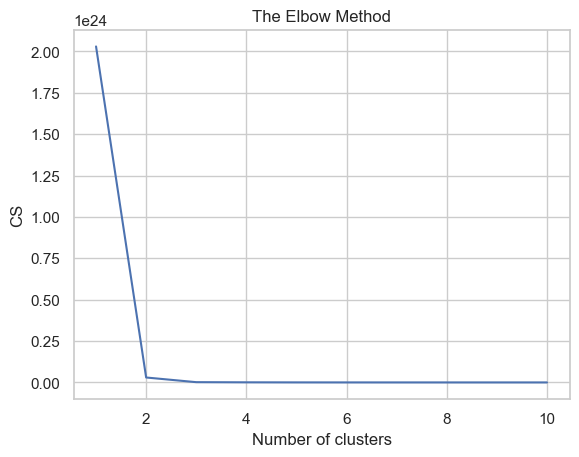

In [239]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### So there will be optimim two number of clusters.
### One which indicates Fradulaent transaction
### Other indicates Valid Transactions

In [240]:
pred = kmeans.predict(data)

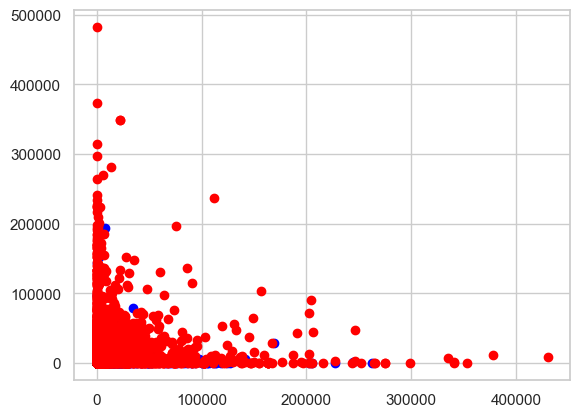

In [219]:
df4=data[data.FLAG==0]
df5=data[data.FLAG==1]
plt.scatter(df5['Avg min between sent tnx'],df5['Avg min between received tnx'],color='blue')
plt.scatter(df4['Avg min between sent tnx'],df4['Avg min between received tnx'],color='red')

### Here red indicates the valid transactions
### blue indicates the frauds

# Conclusion
### So the number of valid transactions are more than the number of fradulaent transactions on etherum cryptocurrency